In [205]:
import numpy as np
import matplotlib.pyplot as plt
import random
try:
    import importlib
    importlib.reload(h)
    importlib.reload(f)
    importlib.reload(d)
except NameError: # It hasn't been imported yet
    import helpers as h
    import implementations as f
    import data_processing as d

# Data preprocessing and feature selections

## Data preprocessing

#For this to work, the data folder needs to be one level above the project folder and the folder name needs
#to be 'data'
data_folder = '../data/'
x_train, x_test, y_train, train_ids, test_ids = h.load_csv_data(data_folder)


In [3]:
np.random.seed(0)

x_train, x_test, y_train, train_ids, test_ids = h.load_csv_data("../data")

np.save('../data/y_train.npy', y_train)
np.save('../data/x_train.npy', x_train)
np.save('../data/x_test.npy', x_test)
np.save('../data/train_ids.npy', train_ids)
np.save('../data/test_ids.npy', test_ids)

In [4]:
x_train = np.load("../data/x_train.npy")
x_test = np.load("../data/x_test.npy")
y_train = np.load("../data/y_train.npy")
train_ids = np.load("../data/train_ids.npy")
test_ids = np.load("../data/test_ids.npy")

In [5]:
#features_named all the features names and remove the ID column
features_name = np.genfromtxt('../data/x_train.csv', delimiter=',', dtype=str, max_rows=1)[1:] 
features_name

array(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES',
       'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1',
       'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE',
       'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS',
       'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW',
       'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2',
       'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA',
       'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3',
       'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3',
       'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK',
       'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2',
       'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5',
    

## Feature selection

one paper on internet suggests to use these features : 

 _RFHYPE5, TOLDHI2, _CHOLCHK, _BMI5, SMOKE100, CVDSTRK3, DIABETE3, _TOTINDA, _FRTLT1, _VEGLT1, _RFDRHV5, HLTHPLN1, MEDCOST, GENHLTH, MENTHLTH, PHYSHLTH, DIFFWALK, SEX, _AGEG5YR, EDUCA, and INCOME2

We apply a mask to get only these important features.

Then using we use our preprocessing function. For feature where the answer is yes or no we make the data binary, ordinal (categorical) variables ares changed to 0,1,2,...,Missing values are replace by the mean of the column.


In [6]:
#Select the important features
features_list = ['_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', 'DIABETE3', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5', 
                 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2']


# Processing [Necessary] 
### We want to clean the data for each feature, making them binary for yes/no, etc... and rename them

In [7]:
X = [x_train, x_test]
print(x_train.shape)

for i,x in enumerate(X): 
    x = d.masking(x, features_name,features_list)
    x = d.feature_processing_test(x)
    x = d.replace_nan_mean_column(x)
    X[i] = x


x_train_algo, x_test_algo = X[0], X[1]

(328135, 321)


In [8]:
trainMask, testMask = d.masking((x_train, x_test),features features_list)
trainProcessed = d.feature_processing_test(trainMask)

#Test data Processing 
testProcessed  = d.feature_processing_test(testMask)

x_train_algo = f.replaceMissingValuesMean(trainProcessed)
x_test_algo = f.replaceMissingValuesMean(testProcessed)
print(x_train_algo[:,19])
print(len(x_train_algo))
print(len(features_list))


TypeError: masking() missing 1 required positional argument: 'features_list'

In [9]:
##test chelou
#x1_stand=f.standardize(x_train_algo)
x_train_stand=np.ones(x_train_algo.shape)
x_test_stand=np.ones(x_test_algo.shape)

x_trai_stand=f.standardize(x_train_algo)

for i in range(len(features_list)):
  x_train_stand[i]=f.standardize(x_train_algo[i])
  x_test_stand[i]=f.standardize(x_test_algo[i])

print(x_trai_stand==x_train_stand)



[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


### Now that the preprocessing has been done, we can format the data to be used by the algorithms

In [10]:
tX_train = np.c_[np.ones((len(x_train_algo), 1)), x_train_algo]
tX_test = np.c_[np.ones((len(x_test_algo), 1)), x_test_algo]

#tX_train = np.c_[np.ones((len(x_train_algo), 1)), x_train_stand]
#tX_test = np.c_[np.ones((len(x_test_algo), 1)), x_test_stand]

### Initialisation of set parameters

In [11]:
initial_w = [random.choice([1, -1]) for i in range(len(tX_train[0]))]
max_iter = 500

### Separation of the dataset in a test/train set

In [103]:
tX_train_train = tX_train[:int(len(tX_train)*0.8)]
y_train_train = y_train[:int(len(tX_train)*0.8)]
tX_train_test = tX_train[int(len(tX_train)*0.8):]
y_train_test = y_train[int(len(tX_train)*0.8):]



## Plotting functions

In [35]:
def plotLossMSE(weights, loss, y, x ):
    loss_test_set = []

    for w in weights:
        loss_test_set.append(f.compute_mse(y, x, w))

    plt.figure(0)
    plt.semilogy(loss, label = "intial_loss")
    plt.semilogy(loss_test_set, label = "test_loss")
    plt.legend()
    plt.show()

## And then, we can run the algorithms

1. MSE gradient descent

In [120]:
tX_train_neg = tX_train_train[y_train_train == -1]
tX_train_pos = tX_train_train[y_train_train == 1]

y_train_neg = y_train_train[y_train_train == -1]
y_train_pos = y_train_train[y_train_train == 1]

tX_train_neg_red = tX_train_neg[:int(len(tX_train_pos)),:]
y_train_neg_red = y_train_neg[:int(len(tX_train_pos))]

tX_train_train_reduced = np.concatenate((tX_train_neg_red, tX_train_pos))
y_train_train_reduced = np.concatenate((y_train_neg_red, y_train_pos))

We try several weights for gamma to see which one is the best

Gradient Descent(199/200): Final loss=1.5583404219624488
0.002000: 1.558340
Gradient Descent(199/200): Final loss=1.0938345073741935
0.004000: 1.093835
Gradient Descent(199/200): Final loss=0.858779034941902
0.006000: 0.858779
Gradient Descent(199/200): Final loss=0.7226242299106065
0.008000: 0.722624
Gradient Descent(199/200): Final loss=0.6329712673085639
0.010000: 0.632971
Gradient Descent(10/200): Final loss=12581.300861055412
0.012000: 0.000000
Gradient Descent(4/200): Final loss=10336.75896259267
0.014000: 0.000000


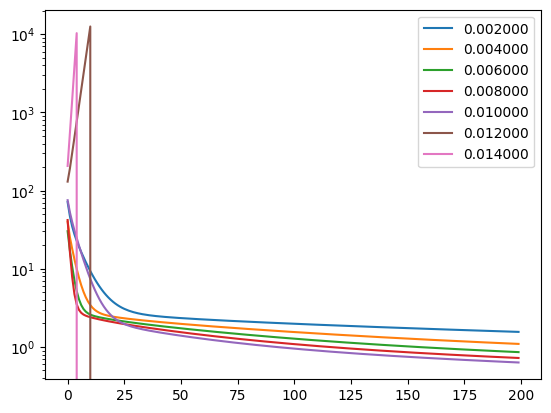

In [71]:
#Try different values of gamma for gradient descent with MSE as loss function
gamma = np.arange(0.002, 0.016, 0.002)
for g in gamma:
    w, loss = f.mean_squared_error_gd(y_train_train, tX_train_train, initial_w, 200, g)
    print("%f: %f" % (g, loss[-1]))
    plt.semilogy(loss, label = "%f" % g)


plt.legend()
plt.show()


It semes the best one is gamma = 0.01, we'll then use this one 

In [109]:
w_mse_gd, loss_mse_gd = f.mean_squared_error_gd(y_train_train, tX_train_train, initial_w, 2000, 0.0001)

Gradient Descent(1999/2000): Final loss=1.4674265115330645


We compare the progression of the loss on the test set, in order to ensure there's no overfitting with the increasing amount of iteration

In [37]:
plotLossMSE(w_mse_gd, loss_mse_gd, y_train_test, tX_train_test)

KeyboardInterrupt: 

In [113]:
y_pred = tX_train_test.dot(w_mse_gd[-1])
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))
print("F1 score: ", f1)


Accuracy:  0.6268913709296479
F1 score:  0.13157894736842105


In [114]:
#Apply the model to the test sample

y_test = tX_test.dot(w_mse_gd[-1])
y_test_rounded = np.where(y_test > 0, 1, -1) #not sure about this line

print('weights = \n\n', w_mse_gd[-1],'\n\n Loss = ', loss_mse_gd[-1],'\n\n*****************************************************************************',
      ' \n\n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_rounded == 1)/len(y_test_rounded))

weights = 

 [ 0.82052074  0.51647901 -0.01211363 -0.04327539 -0.03119055  0.8392515
 -0.13274209 -0.18239869  0.6029245  -0.08410116 -0.75144129 -0.03173876
  0.81031081 -0.1046543  -0.15782911  0.87584787 -0.26219147 -0.05150856
 -0.16369252  0.86284716  0.91663502  0.92029775] 

 Loss =  1.4674265115330645 

*****************************************************************************  

 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.33970871922398266


In [ ]:
#h.create_csv_submission(test_ids, y_test_rounded, 'submission_gd.csv')

Lets run some cross validation to see the best initial weights (as a function of the proportion of 1, -1 and 0)


2. MSE SGD

SGD iter. 999/999: loss=3.306558108156385, w0=0.8604755895930409, w1=0.6512128038603168
0.000100: 3.306558
SGD iter. 999/999: loss=3.3080137979486626, w0=0.8290158203578314, w1=0.578685159656784
0.000200: 3.308014
SGD iter. 999/999: loss=1.3312468841089882, w0=0.8097731391712423, w1=0.49380818536739407
0.000300: 1.331247
SGD iter. 999/999: loss=0.03486947771508358, w0=0.7816746356501428, w1=0.3877466589186048
0.000400: 0.034869
SGD iter. 999/999: loss=0.025592117522220813, w0=0.7805988454565711, w1=0.41429298561130984
0.000500: 0.025592
SGD iter. 999/999: loss=0.2365302423353723, w0=0.7699343407704058, w1=0.28190237561905196
0.000600: 0.236530
SGD iter. 999/999: loss=0.5720872040185334, w0=0.7579913822485901, w1=0.24679046896912107
0.000700: 0.572087
SGD iter. 999/999: loss=0.1631443056055404, w0=0.7320913144139969, w1=0.14649664897267425
0.000800: 0.163144
SGD iter. 999/999: loss=1.0173639358951578, w0=0.7492368780507389, w1=0.15713367505889175
0.000900: 1.017364
SGD iter. 999/999: lo

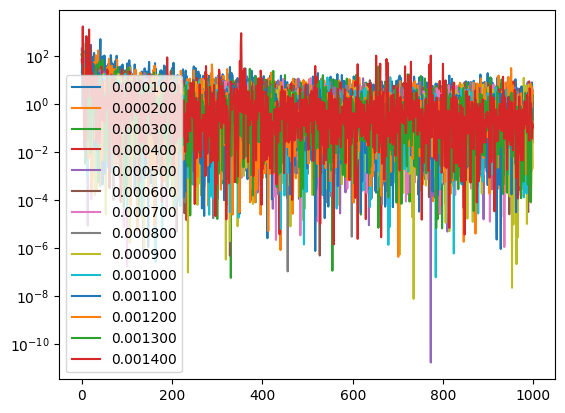

In [115]:
#Try different values of gamma for gradient descent with MSE as loss function
gamma = np.arange(0.0001, 0.0015, 0.0001)
g_opti = gamma[0]
loss_opti = 1000
for g in gamma:
    w, loss = f.mean_squared_error_sgd(y_train_train_reduced, tX_train_train_reduced, initial_w, 1000, g)
    mean_loss = np.mean(loss[-100:])
    if mean_loss < loss_opti:
        loss_opti = mean_loss
        g_opti = g
    print("%f: %f" % (g, loss[-1]))
    plt.semilogy(loss, label = "%f" % g)

print("optimal gamma: ", g_opti)
plt.legend()
plt.show()


In [220]:
w_mse_sgd, loss_mse_sgd = f.mean_squared_error_sgd(y_train_train_reduced, tX_train_train_reduced, initial_w, 8000, 0.001)

SGD iter. 7999/7999: loss=0.24174221117884592, w0=0.5842168939869486, w1=0.15200134317775804


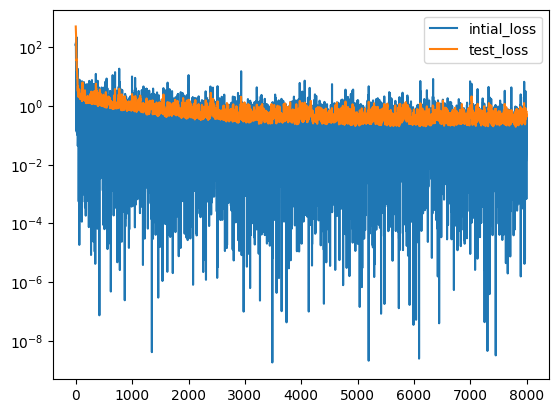

In [222]:
plotLossMSE(w_mse_sgd, loss_mse_sgd, y_train_test, tX_train_test)

In [229]:
y_pred = tX_train_test.dot(w_mse_sgd[-1])
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.5965684855318695
F1 score:  0.23497457235321312


In [230]:
y_test_sgd = tX_test.dot(w_mse_sgd[-1])
y_test_rounded_sgd = np.where(y_test_sgd > 0, 1, -1)

print('weights = \n', w_mse_sgd[-1],'\n Loss = ', loss_mse_sgd[-1],'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_rounded_sgd == 1)/len(y_test_rounded_sgd))

weights = 
 [ 0.58421689  0.15200134 -0.04123393 -0.06149277 -0.14796652 -0.22504104
 -0.13450401 -0.4810878  -0.10478361 -0.31004641 -0.06480837 -0.00552424
 -0.26113397  0.01330946 -0.09038159  0.5227988   0.10294684 -0.12549965
 -0.31492912 -0.10795662  0.2951786  -0.06925756] 
 Loss =  0.24174221117884592 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.4331453021146655


3. Least squares

In [267]:
#split the train data with 50/50 label
tX_train_neg = tX_train_train[y_train_train == -1]
tX_train_pos = tX_train_train[y_train_train == 1]
print(len(tX_train_neg), len(tX_train_pos))

y_train_neg = y_train_train[y_train_train == -1]
y_train_pos = y_train_train[y_train_train == 1]

tX_train_neg_red = tX_train_neg[:int(len(tX_train_pos)*2),:]
y_train_neg_red = y_train_neg[:int(len(tX_train_pos)*2)]

tX_train_train_reduced = np.concatenate((tX_train_neg_red, tX_train_pos))
y_train_train_reduced = np.concatenate((y_train_neg_red, y_train_pos))


239400 23108


In [268]:
w_ls, loss_ls = f.least_squares(y_train_train_reduced, tX_train_train_reduced)

In [269]:
y_pred = tX_train_test.dot(w_ls)
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.847181800173709
F1 score:  0.40744460856720827


In [270]:

y_test_ls = tX_test.dot(w_ls)
y_test_ls = np.where(y_test_ls > 0, 1, -1)

print('weights = \n', w_ls,'\n Loss = ', loss_ls,'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_ls == 1)/len(y_test_ls))

weights = 
 [-0.10611158  0.14687807  0.00219303  0.00057961 -0.05586303 -0.04311655
 -0.21873145 -0.42730446 -0.07680913 -0.23363501 -0.00521877 -0.01551829
 -0.1589707  -0.10743765 -0.19060592  0.12411767  0.05531594 -0.35594212
  0.07279247 -0.00920733 -0.00938488 -0.00961666] 
 Loss =  0.3005152511190173 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.16730816701560627


In [271]:
h.create_csv_submission(test_ids, y_test_ls, 'submission_ls.csv')

4. Ridge regression

In [272]:
#Try different values of gamma for gradient descent with MSE as loss function
gamma = np.arange(5*10**(-7), 1*10**(-6), 1*10**(-7))
#gamma = [44,12,3, 0.1, 5*10**(-7)]
g_opti = gamma[0]
loss_opti = 1000
for g in gamma:
    w_ridge, loss_ridge = f.ridge_regression(y_train_train, tX_train_train, g)
    if loss_ridge < loss_opti:
        loss_opti = loss_ridge
        g_opti = g
    print("%e: %f" % (g, loss_ridge))
    #plt.semilogy(loss_ridge, label = "%f" % g)

print("optimal gamma: %.e " % g_opti)
#plt.legend()
#plt.show()


5.000000e-07: 0.136931
6.000000e-07: 0.136931
7.000000e-07: 0.136931
8.000000e-07: 0.136931
9.000000e-07: 0.136931
optimal gamma: 5e-07 


In [273]:
w_ridge, loss_ridge = f.ridge_regression(y_train_train_reduced, tX_train_train_reduced, 5*10**(-7))

In [274]:
y_pred = tX_train_test.dot(w_ridge)
y_pred = np.where(y_pred > 0, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.847181800173709
F1 score:  0.40744460856720827


In [275]:
y_test_ridge = tX_test.dot(w_ridge)
y_test_ridge = np.where(y_test_ridge > 0, 1, -1)

print('weights = \n', w_ridge,'\n Loss = ', loss_ridge,'\n*****************************************************************************',
      ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_ridge == 1)/len(y_test_ridge))

weights = 
 [-0.10613361  0.14687717  0.00219309  0.0005796  -0.05586355 -0.0431167
 -0.21873064 -0.42730059 -0.0768086  -0.23363393 -0.00521922 -0.01551847
 -0.15896918 -0.10743785 -0.19060428  0.12411468  0.05531626 -0.35585239
  0.07278767 -0.00920792 -0.0093849  -0.0096176 ] 
 Loss =  0.3005152511355313 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.16729902449281855


In [98]:
h.create_csv_submission(test_ids, y_test_ridge, 'submission_ridge.csv')

5. Logistic regression

In [276]:
tX_train_neg = tX_train_train[y_train_train == -1]
tX_train_pos = tX_train_train[y_train_train == 1]

y_train_neg = y_train_train[y_train_train == -1]
y_train_pos = y_train_train[y_train_train == 1]

tX_train_neg_red = tX_train_neg[:int(len(tX_train_pos)*2),:]
y_train_neg_red = y_train_neg[:int(len(tX_train_pos)*2)]

tX_train_train_reduced = np.concatenate((tX_train_neg_red, tX_train_pos))
y_train_train_reduced = np.concatenate((y_train_neg_red, y_train_pos))

In [277]:
y_train_processed_logreg = np.where(y_train == 1, 1, 0)
y_train_train_lg = np.where(y_train_train_reduced == 1, 1, 0)
y_train_test_lg = np.where(y_train_test == 1, 1, 0)
initial_w = [random.choice([1, 0]) for i in range(len(tX_train[0]))]
#transform initial_w as an array
initial_w = np.array(initial_w)

Gradient Descent(99/99): loss=1.07202471013704, w0=0.6953270683986862, w1=0.11245039101734115
1.000000e-01: 1.072025
Gradient Descent(99/99): loss=1.1631858924945184, w0=0.6841248307921641, w1=0.1511586430325708
1.100000e-01: 1.163186
Gradient Descent(99/99): loss=1.2570036773475215, w0=0.6745429380998622, w1=0.19034558330095805
1.200000e-01: 1.257004
Gradient Descent(99/99): loss=1.3516891197726268, w0=0.6639140929675429, w1=0.23027371689012946
1.300000e-01: 1.351689
Gradient Descent(99/99): loss=1.7457670236277165, w0=0.6939268654007595, w1=0.3932708529430052
1.400000e-01: 1.745767
Gradient Descent(99/99): loss=1.8672630726873471, w0=0.6881672546906757, w1=0.4445545379804773
1.500000e-01: 1.867263
Gradient Descent(99/99): loss=1.9877155613313944, w0=0.6810754940286541, w1=0.493745165399771
1.600000e-01: 1.987716
Gradient Descent(99/99): loss=2.1081813086883576, w0=0.6739619796228917, w1=0.5424106377563742
1.700000e-01: 2.108181
Gradient Descent(99/99): loss=2.2289066529691515, w0=0.6

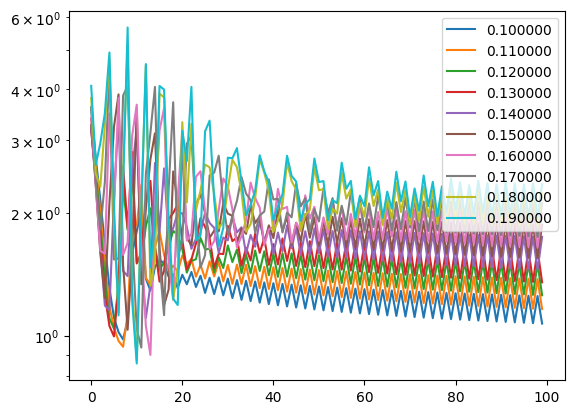

In [279]:
#Try different values of gamma for gradient descent with MSE as loss function
gamma = np.arange(10*10**(-2), 20*10**(-2), 1*10**(-2))
#gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
g_opti = gamma[0]
loss_opti = 1000
for g in gamma:
    w_logreg, loss_logreg = f.logistic_regression(y_train_train_lg, tX_train_train_reduced, initial_w, 100, g)
    if np.mean(loss_logreg[-10:]) < loss_opti:
        loss_opti = np.mean(loss_logreg[-10:])
        g_opti = g
    print("%e: %f" % (g, loss_logreg[-1]))
    plt.semilogy(loss_logreg, label = "%f" % g)

print("optimal gamma: %e " % g_opti)
plt.legend()
plt.show()

In [282]:
w_logreg, loss_logreg = f.logistic_regression(y_train_train_lg, tX_train_train_reduced,initial_w, 1000, 0.1)

Gradient Descent(999/999): loss=0.7971211482965094, w0=0.21960355813521007, w1=0.6595682867346819


In [41]:
def plotLossLOGREG(weights, loss, y, x ):
    loss_test_set = []

    for w in weights:
        loss_test_set.append(f.compute_loss_logistic(y, x, w))

    plt.figure(0)
    plt.semilogy(loss, label = "initial_loss")
    plt.semilogy(loss_test_set, label = "test_loss")
    plt.legend()
    plt.show()

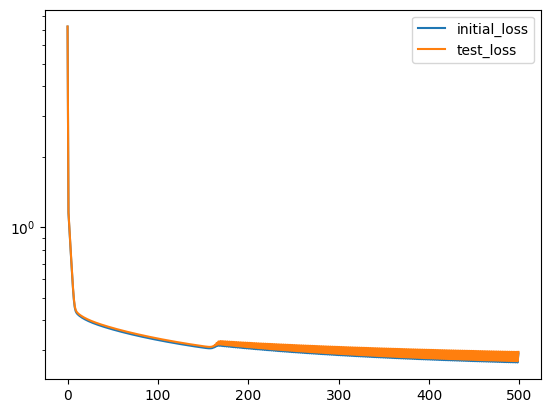

In [42]:
plotLossLOGREG(w_logreg, loss_logreg, y_train_test_lg, tX_train_test)

In [283]:
y_pred = tX_train_test.dot(w_logreg[-1])
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.where(y_pred == 1, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.9090770566992245
F1 score:  0.1928851616393886


In [284]:
y_test_logreg = tX_test.dot(w_logreg[-1])
y_test_logreg = np.where(y_test_logreg > 0.5, 1, 0)

print('weights = \n', w_logreg[-1],'\n Loss = ', loss_logreg[-1],'\n*****************************************************************************',
        ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train== 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_logreg == 1)/len(y_test_logreg))

weights = 
 [ 0.21960356  0.65956829 -0.04164286 -0.0513066  -0.29206735  0.04913939
 -1.18454778 -1.09275646 -0.59314044 -1.382996   -0.27699926 -0.18401414
 -0.98362151 -0.82121437 -1.08942799  0.18428063  0.24536897  0.7374525
 -0.47901103 -0.20085158 -0.16700371  0.08333862] 
 Loss =  0.7971211482965094 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.022591173808500717


In [81]:
y_sub = np.where(y_test_logreg == 1, 1, -1)
h.create_csv_submission(test_ids, y_sub, 'submission_logreg.csv')

6. Regularized logistic regression

optimal gamma: 1.000000e-02 
optimal lambda: 1.000000e-01 


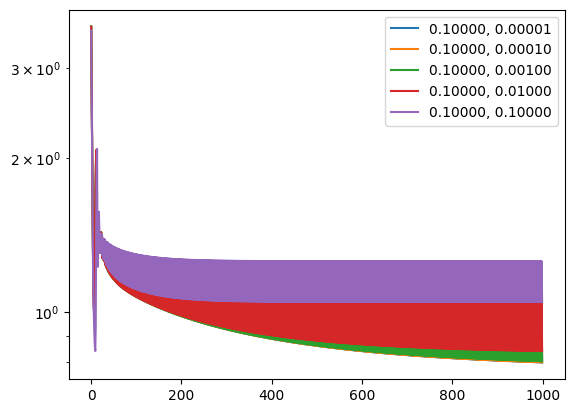

In [285]:
#Try different values of gamma for gradient descent with MSE as loss function
#gamma = np.arange(10*10**(-2), 20*10**(-2), 1*10**(-2))
gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1]
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1]
g_opti = gamma[0]
l_opti = lambdas[0]
loss_opti = 1000
for l in lambdas:
    for g in gamma:
        w_logreg, loss_logreg = f.reg_logistic_regression(y_train_train_lg, tX_train_train_reduced,l,  initial_w, 1000, g)
        if np.mean(loss_logreg[-10:]) < loss_opti:
            loss_opti = np.mean(loss_logreg[-10:])
            g_opti = g
            l_opti = l
        #print("%e, %e: %f" % (g, l, loss_logreg[-1]))
    plt.semilogy(loss_logreg, label = "%.5f, %.5f" % (g, l) )

print("optimal gamma: %e " % g_opti)
print("optimal lambda: %e " % l_opti)
plt.legend()
plt.show()

In [217]:
w_reg_logreg, loss_reg_logreg = f.reg_logistic_regression(y_train_train_lg, tX_train_train_reduced, l_opti, initial_w, 6000, g_opti)

In [218]:
y_pred = tX_train_test.dot(w_reg_logreg[-1])
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.where(y_pred == 1, 1, -1)

_,_,_,_,f1 = f.confusion_matrix(y_train_test, y_pred)

print("Accuracy: ", np.sum(y_pred == y_train_test)/len(y_train_test))

print("F1 score: ", f1)

Accuracy:  0.8695658798969936
F1 score:  0.37012509197939664


In [219]:
y_test_reg_logreg = tX_test.dot(w_reg_logreg[-1])
y_test_reg_logreg = np.where(y_test_reg_logreg > 0.5, 1, 0)

print('weights = \n', w_reg_logreg[-1],'\n Loss = ', loss_reg_logreg[-1],'\n*****************************************************************************',
        ' \n Train sample : \n', 'Heart attack rate = ', np.count_nonzero(y_train == 1)/len(y_train), '\n \n Test sample : \n', 'Heart attack rate = ', np.count_nonzero(y_test_reg_logreg == 1)/len(y_test_reg_logreg))


weights = 
 [-0.08528558  0.21019329  0.01909041  0.00178655 -0.04090119 -0.08167134
 -0.26771923 -0.21615422 -0.24112636 -0.2626394  -0.16627398 -0.10377971
 -0.16877567 -0.17122445 -0.27945675  0.03567885  0.18228154 -0.01988684
 -0.06387902 -0.01686432 -0.01034752 -0.01689669] 
 Loss =  0.501688356246266 
*****************************************************************************  
 Train sample : 
 Heart attack rate =  0.08830207079403295 
 
 Test sample : 
 Heart attack rate =  0.11644831274741953


In [147]:
y_sub = np.where(y_test_reg_logreg == 1, 1, -1)
h.create_csv_submission(test_ids, y_sub, 'submission_reg_logreg6.csv')